In [76]:
import numpy as np
import pandas as pd
import seaborn as sns


In [77]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
data=data.drop(['RowNumber','CustomerId','Surname',],axis='columns')

In [79]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
data.shape

(10000, 11)

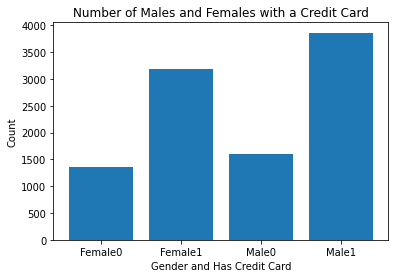

In [81]:
import matplotlib.pyplot as plt
# Group the data by gender and has a credit card
grouped_data = data.groupby(['Gender', 'HasCrCard']).size().reset_index(name='count')

# Create a bar chart
plt.bar(grouped_data['Gender'] + grouped_data['HasCrCard'].astype(str), grouped_data['count'])
plt.xlabel('Gender and Has Credit Card')
plt.ylabel('Count')
plt.title('Number of Males and Females with a Credit Card')
plt.show()

In [82]:
import folium
grouped_data = data.groupby('Geography').size().reset_index(name='count')

# Create a map centered on Europe
map = folium.Map(location=[51.5074, 0.1278], zoom_start=4)

# Add markers for each country
for index, row in grouped_data.iterrows():
    location = None
    if row['Geography'] == 'France':
        location = [46.2276, 2.2137]
    elif row['Geography'] == 'Spain':
        location = [40.4637, -3.7492]
    elif row['Geography'] == 'Germany':
        location = [51.1657, 10.4515]
    marker = folium.Marker(location=location, popup=row['Geography'] + ': ' + str(row['count']))
    marker.add_to(map)
map

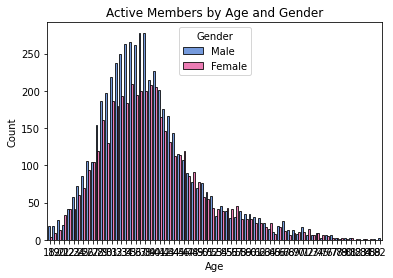

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
sns.countplot(x='Age', hue='Gender', data=data, hue_order=['Male', 'Female'], palette=['cornflowerblue', 'hotpink'], 
              edgecolor='black', linewidth=0.8)

# Set the plot title and axis labels
plt.title('Active Members by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

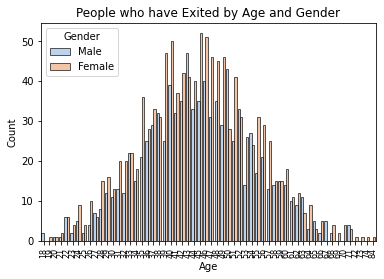

In [84]:
# Create a count plot of people who have exited by age and gender
sns.countplot(x='Age', hue='Gender', data=data[data['Exited'] == 1], hue_order=['Male', 'Female'], 
              palette='pastel', edgecolor='black', linewidth=0.8, 
              alpha=0.8)

# Set the plot title and axis labels
plt.title('People who have Exited by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

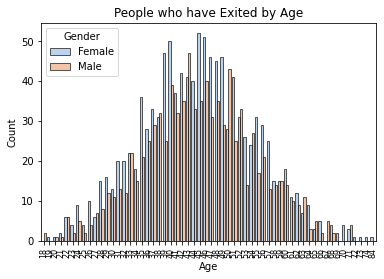

In [85]:
# Create a count plot of people who have exited by age
sns.countplot(x='Age',hue='Gender', data=data[data['Exited'] == 1], 
              palette='pastel', edgecolor='black', linewidth=0.8, 
              alpha=0.8)

# Set the plot title and axis labels
plt.title('People who have Exited by Age')
plt.xlabel('Age')
plt.ylabel('Count')
# Adjust the size and rotation of the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

In [11]:
# Group the data into two sets based on the Exited column
not_exited = data[data['Exited'] == 0]
exited = data[data['Exited'] == 1]


In [12]:
exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

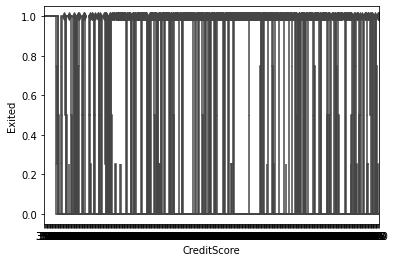

In [13]:
sns.boxplot(data=data, x="CreditScore", y="Exited")


<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

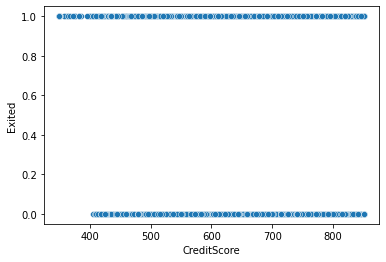

In [14]:
sns.scatterplot(data=data, x="CreditScore", y="Exited")

<AxesSubplot:>

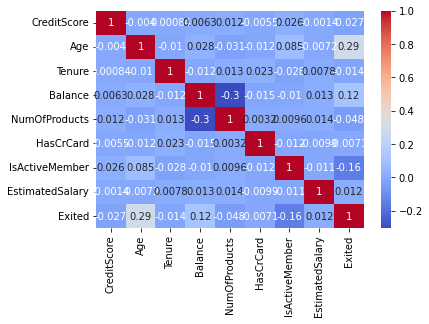

In [15]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [87]:
dummies = pd.get_dummies(data.Gender)
dummies
data = data.drop(['Gender'],axis='columns')
data=pd.concat([data,dummies],axis='columns')
data.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [88]:
N = 8
corr_with_target = corr_matrix["Exited"].abs().sort_values(ascending=False)
top_vars = corr_with_target[1:N+1].index.tolist()

In [89]:
top_vars

['Age',
 'IsActiveMember',
 'Balance',
 'NumOfProducts',
 'CreditScore',
 'Tenure',
 'EstimatedSalary',
 'HasCrCard']

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data.drop(["Exited","Geography"], axis='columns')
y = data["Exited"]

model = LogisticRegression()
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

selected_vars = X.columns[rfe.support_].tolist()
print(selected_vars)

['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Female', 'Male']


In [91]:
ranking = rfe.ranking_
print(ranking)

[1 1 1 2 1 1 1 3 1 1]


In [92]:
x=data.drop(['Geography','Exited','Female','Male'],axis='columns')
y=data.Exited

In [93]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [94]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)


In [96]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2388,762,34,4,88815.56,2,1,0,68562.26
6334,608,35,6,0.00,2,1,1,143463.28
1944,783,39,9,0.00,2,1,0,143752.77
3063,609,32,7,71872.19,1,1,1,151924.90
9133,705,36,1,111629.29,1,1,1,21807.16
...,...,...,...,...,...,...,...,...
7997,465,24,6,156007.09,1,1,0,191368.37
3843,783,38,1,0.00,3,1,1,80178.54
4006,654,37,6,83568.55,1,1,0,47046.72
6405,509,41,7,126683.80,1,0,1,114775.53


In [97]:
model =  RandomForestClassifier(n_estimators=70)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=70)

In [98]:
model.score(x_test,y_test)

0.854

In [99]:
predicted=model.predict(x_test)

In [100]:
# concatenate predicted values to x_test
x_test_with_pred = np.concatenate((x_test, predicted.reshape(-1, 1)), axis=1)

# add column name for predicted values
column_names = list(x_test.columns) + ['predicted']
x_test_with_pred = pd.DataFrame(x_test_with_pred, columns=column_names)

In [102]:
x_test_with_pred.to_csv('predicted.csv', index=False)

In [105]:
x_test_with_pred['predicted'].value_counts()
# as we can see as per the model prediction 370 people are most likely to exit the services
#and 2630 will continue their services 

0.0    2630
1.0     370
Name: predicted, dtype: int64